In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
from matplotlib.pyplot import figure
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Use scikit-learn to grid search the dropout rate
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
import time #helper libraries
from scipy.io import loadmat
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
np.random.seed(5)


Using TensorFlow backend.


In [ ]:
# cc=[2,4,5,6,7,8,9,10,11,12,13,14,15,30,43,44,47,53,56,57,58,59,60,61,61, 63,64,65,67,
69,98,99,100,101,102,103,104,105,106,107,108,117,131,134,135,142,143,146,184,189,191,197,
198,199,228,229,232,233,235,236,239,240,241,242,246,273,274,275,277,278,280,283,284,285,286,287,288,289]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data=np.genfromtxt('/content/drive/My Drive/Colab Notebooks/neighboured20.csv',delimiter=',')


In [ ]:
# data=np.genfromtxt('/content/drive/Averaged_Non_zero_Data.csv',delimiter=',')


In [ ]:
data=data.T

In [ ]:
data.shape

(331, 5001)

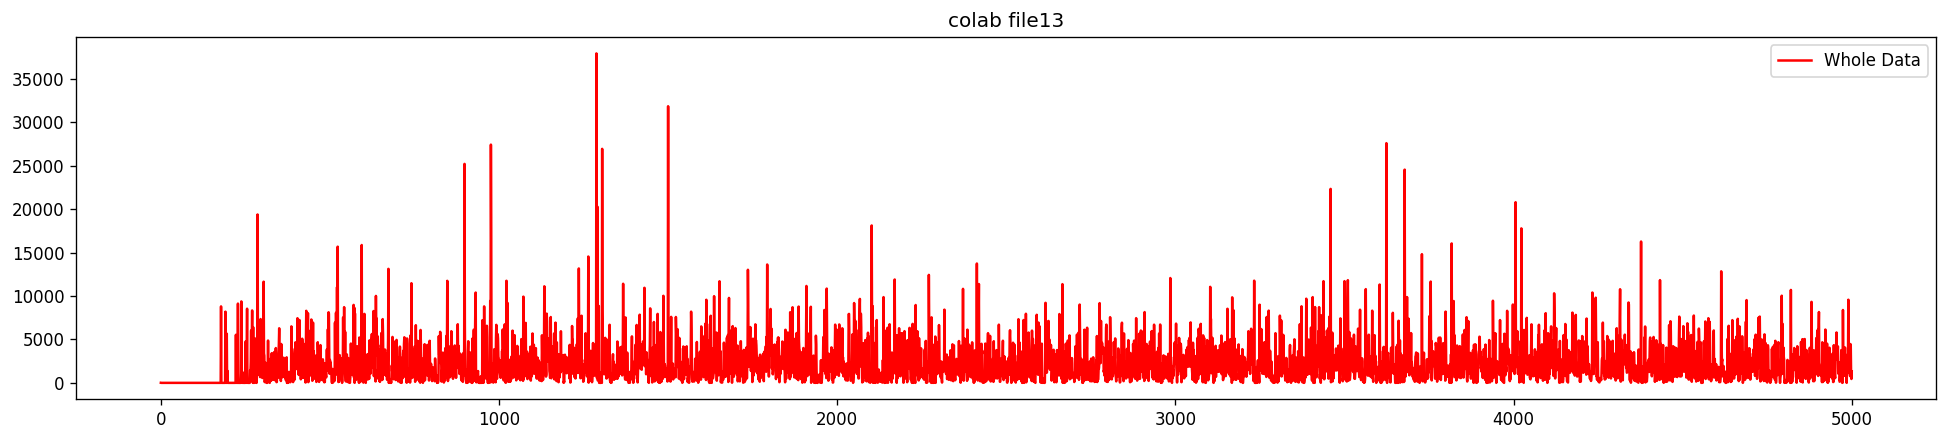

In [ ]:
# plot baseline and predictions
f=13
figure(num=None, figsize=(20, 4), dpi=120, facecolor='w', edgecolor='k')

plt.plot((data[f]),color='r',label="Whole Data")
# plt.show()
# plt.plot(trainPredictPlot,color='g',label="Train")
# # print('testPrices:')
# testPrices=scaler.inverse_transform(dataset[test_size+look_back:])


# plt.plot(testPredictPlot, label="test")
plt.legend()
plt.title('colab file'+str(f))
plt.show()



In [ ]:







# # plot baseline and predictions
# figure(num=None, figsize=(20, 4), dpi=120, facecolor='w', edgecolor='k')
# f=736
# plt.plot((new_data),color='r',label="Whole Data")
# # plt.show()
# # plt.plot(trainPredictPlot,color='g',label="Train")
# # # print('testPrices:')
# # testPrices=scaler.inverse_transform(dataset[test_size+look_back:])


# # plt.plot(testPredictPlot, label="test")
# plt.legend()
# # plt.title('colab file'+str(f))
# plt.show()



In [ ]:
# k=2000
f=13
epoch=150
all_y = data[f]
dataset=all_y.reshape(-1, 1)
print(f)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets, 50% test data, 50% training data
train_size = int(len(dataset) * 0.8)
k=int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1, timestep 240
look_back = 70
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1
model = Sequential()
# model.add(LSTM(50 , activation='relu', input_shape=(1, look_back), return_sequences=True))
model = Sequential()
model.add(LSTM(60, input_shape=(1, look_back)))
model.add(Dropout(0.12))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])



model.fit(trainX, trainY, epochs=epoch, batch_size=60, verbose=0)


# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# testPredictPlot.reshape(-1, 1)
# df[str(f)]=list(testPredictPlot)
# df1[str(f)]=list(data[f])



13


RuntimeError: ignored

In [ ]:
trainX.shape[0]

499

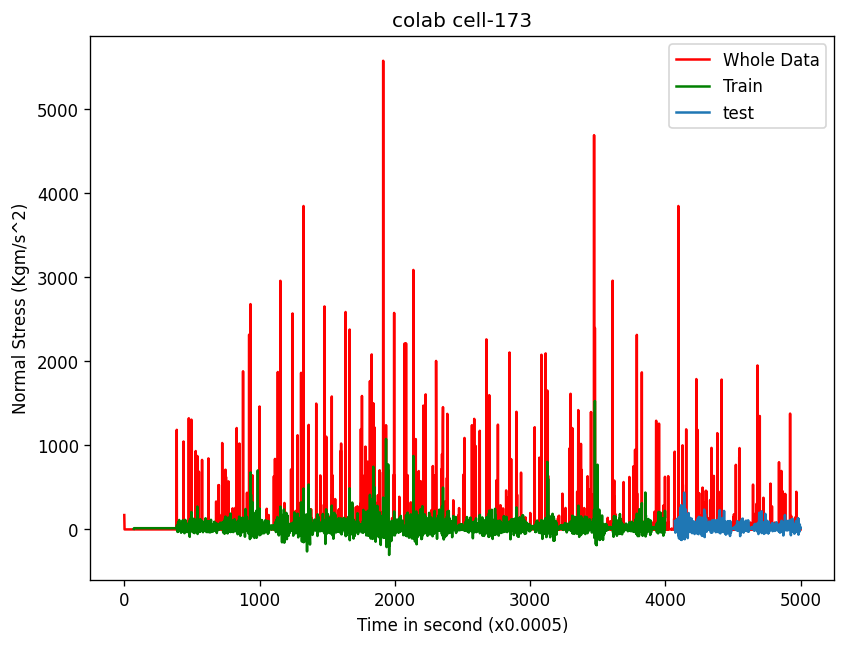

In [ ]:

# plot baseline and predictions
figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')

plt.plot((data[f]),color='r',label="Whole Data")
# plt.show()
plt.plot(trainPredictPlot,color='g',label="Train")
# print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])
plt.ylabel('Normal Stress (Kgm/s^2)')
plt.xlabel('Time in second (x0.0005)')
plt.plot(testPredictPlot, label="test")
plt.legend()
plt.title('colab cell-'+str(f))
plt.show()